In [2]:
import numpy as np 
import pandas as pd
import torch

In [3]:
games = pd.read_csv("filtered_archive/games.csv")
users = pd.read_csv("filtered_archive/users.csv")
recommendations = pd.read_csv("filtered_archive/recommendations.csv")

In [4]:
merged = games.merge(games, how="cross", suffixes=("_1", "_2"))

# Filter to keep only unique pairs (where game_id_1 < game_id_2)
unique_pairs = merged[merged["app_id_1"] < merged["app_id_2"]]

# Reset index for a cleaner DataFrame
unique_pairs = unique_pairs.reset_index(drop=True)

In [5]:
unique_pairs

,app_id_1,title_1,user_reviews_1,app_id_2,title_2,user_reviews_2
0,13500,Prince of Persia: Warrior Within™,2199,113020,Monaco: What's Yours Is Mine,3722
1,13500,Prince of Persia: Warrior Within™,2199,226560,Escape Dead Island,873
2,13500,Prince of Persia: Warrior Within™,2199,250180,METAL SLUG 3,5579
3,13500,Prince of Persia: Warrior Within™,2199,253980,Enclave,1608
4,13500,Prince of Persia: Warrior Within™,2199,282900,Hyperdimension Neptunia Re;Birth1,9686
...,...,...,...,...,...,...
3755165,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,10250,2088570,Tiny Rogues,3050
3755166,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,10250,2096600,Crysis 2 Remastered,2525
3755167,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,10250,2096610,Crysis 3 Remastered,2009
3755168,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,10250,2208920,Assassin's Creed Valhalla,11641


In [6]:
unique_pairs = unique_pairs.drop(["user_reviews_1", "user_reviews_2"], axis=1)

In [7]:
positive_reviews = recommendations[recommendations["is_recommended"] == True].groupby("app_id").size().sort_values(ascending=False)
all_reviews = recommendations.groupby("app_id").size().sort_values(ascending=False)

In [8]:
unique_pairs["positive_reviews_1"] = unique_pairs["app_id_1"].map(positive_reviews)
unique_pairs["positive_reviews_2"] = unique_pairs["app_id_2"].map(positive_reviews)
unique_pairs["all_reviews_1"] = unique_pairs["app_id_1"].map(all_reviews)
unique_pairs["all_reviews_2"] = unique_pairs["app_id_2"].map(all_reviews)

In [9]:
unique_pairs

,app_id_1,title_1,app_id_2,title_2,positive_reviews_1,positive_reviews_2,all_reviews_1,all_reviews_2
0,13500,Prince of Persia: Warrior Within™,113020,Monaco: What's Yours Is Mine,287,1297,354,1494
1,13500,Prince of Persia: Warrior Within™,226560,Escape Dead Island,287,122,354,202
2,13500,Prince of Persia: Warrior Within™,250180,METAL SLUG 3,287,917,354,1065
3,13500,Prince of Persia: Warrior Within™,253980,Enclave,287,513,354,733
4,13500,Prince of Persia: Warrior Within™,282900,Hyperdimension Neptunia Re;Birth1,287,1151,354,1269
...,...,...,...,...,...,...,...,...
3755165,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2088570,Tiny Rogues,1095,44,1146,44
3755166,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2096600,Crysis 2 Remastered,1095,216,1146,233
3755167,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2096610,Crysis 3 Remastered,1095,173,1146,192
3755168,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2208920,Assassin's Creed Valhalla,1095,495,1146,858


In [10]:
grouped_pos_recommendations = recommendations[recommendations["is_recommended"]].groupby("user_id")["app_id"].apply(set).reset_index()
grouped_pos_recommendations.rename(columns={"app_id": "positive_games"}, inplace=True)

grouped_recommendations = recommendations.groupby("user_id")["app_id"].apply(set).reset_index()
grouped_recommendations.rename(columns={"app_id": "recommended_games"}, inplace=True)

In [11]:
grouped_pos_recommendations["positive_games"]

0         {1302240, 1174180, 301640, 1172380, 534380, 15...
1         {270880, 675010, 581320, 1238860, 47790, 51986...
2         {1384160, 335300, 1240440, 485510, 627270, 601...
3         {330020, 504230, 200710, 275850, 1341290, 1222...
4         {284160, 559650, 225540, 379430, 1274570, 1172...
                                ...                        
282116    {1577120, 1426210, 552520, 1172380, 1222700, 1...
282117    {1999360, 418370, 1174180, 641320, 1172620, 20...
282118    {780290, 200710, 1366540, 230290, 290340, 4010...
282119    {420290, 504230, 975370, 589290, 22320, 244210...
282120    {367520, 427520, 757310, 1850570, 620, 1161580...
Name: positive_games, Length: 282121, dtype: object

In [12]:
from tqdm import tqdm
from collections import Counter
from itertools import combinations

tqdm.pandas()

In [13]:
# Create a counter to store co-occurrence counts
pair_counts = Counter()

# Process each set with a progress bar
for game_set in tqdm(grouped_pos_recommendations["positive_games"], desc="Processing game lists"):
    for pair in combinations(sorted(game_set), 2):  # Ensure consistent ordering
        pair_counts[pair] += 1

# Convert list of tuples to a DataFrame
common_counts_df = pd.DataFrame(pair_counts.items(), columns=["pair", "common_positive"])
common_counts_df[["app_id_1", "app_id_2"]] = pd.DataFrame(common_counts_df["pair"].tolist(), index=common_counts_df.index)
common_counts_df.drop(columns=["pair"], inplace=True)

# Merge with unique_pairs DataFrame
unique_pairs = unique_pairs.merge(common_counts_df, on=["app_id_1", "app_id_2"], how="left").fillna(0)


Processing game lists: 100%|██████████| 282121/282121 [00:54<00:00, 5140.91it/s]


In [14]:
# Create a counter to store co-occurrence counts
pair_counts = Counter()

# Process each set with a progress bar
for game_set in tqdm(grouped_recommendations["recommended_games"], desc="Processing game lists"):
    for pair in combinations(sorted(game_set), 2):  # Ensure consistent ordering
        pair_counts[pair] += 1

# Convert list of tuples to a DataFrame
common_counts_df = pd.DataFrame(pair_counts.items(), columns=["pair", "common_recommended"])
common_counts_df[["app_id_1", "app_id_2"]] = pd.DataFrame(common_counts_df["pair"].tolist(), index=common_counts_df.index)
common_counts_df.drop(columns=["pair"], inplace=True)

# Merge with unique_pairs DataFrame
unique_pairs = unique_pairs.merge(common_counts_df, on=["app_id_1", "app_id_2"], how="left").fillna(0)


Processing game lists: 100%|██████████| 282396/282396 [01:19<00:00, 3542.67it/s]


In [15]:
unique_pairs.sort_values("common_recommended")

,app_id_1,title_1,app_id_2,title_2,positive_reviews_1,positive_reviews_2,all_reviews_1,all_reviews_2,common_positive,common_recommended
1877584,1279630,Vampire: The Masquerade - Shadows of New York,1336600,Cabin Fever,190,43,250,46,0.0,0.0
1432257,434170,The Jackbox Party Pack 3,1166860,Rival Stars Horse Racing: Desktop Edition,922,64,953,83,0.0,0.0
1432253,434170,The Jackbox Party Pack 3,1157390,King Arthur: Knight's Tale,922,305,953,371,0.0,0.0
1432252,434170,The Jackbox Party Pack 3,1155970,Roadwarden,922,126,953,129,0.0,0.0
1432251,434170,The Jackbox Party Pack 3,1154840,Shadow Empire,922,225,953,275,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1362217,377160,Fallout 4,1091500,Cyberpunk 2077,24099,31048,32194,41806,4038.0,6674.0
1590360,275850,No Man's Sky,1091500,Cyberpunk 2077,24176,31048,30002,41806,4316.0,6740.0
1522010,1091500,Cyberpunk 2077,1174180,Red Dead Redemption 2,31048,22194,41806,25208,4871.0,6960.0
1323405,292030,The Witcher® 3: Wild Hunt,1091500,Cyberpunk 2077,25213,31048,27231,41806,5546.0,7493.0


In [16]:
file_path = "/media/lars/F77E-7D07/"
unique_pairs.to_csv(file_path + "unique_pairs.csv", index=False)

In [17]:
file_path = "/media/lars/F77E-7D07/"
unique_pairs = pd.read_csv(file_path + "unique_pairs.csv")

In [18]:
pr1_tensor = torch.tensor(unique_pairs["positive_reviews_1"], dtype=torch.float32) / len(recommendations)
pr2_tensor = torch.tensor(unique_pairs["positive_reviews_2"], dtype=torch.float32) / len(recommendations)
tpr_tensor = torch.tensor(unique_pairs["common_positive"], dtype=torch.float32) / len(recommendations)


In [50]:
unique_pairs["pmi"] = (torch.log2((tpr_tensor ** 2)/ (pr1_tensor * pr2_tensor))).numpy()

Lowest non -inf PMI: -23.707148


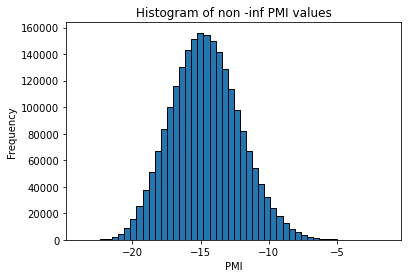

In [51]:
unique_pairs["pmi"]
# Get the lowest non -inf PMI value
lowest_non_inf_pmi = unique_pairs[unique_pairs["pmi"] != -float('inf')]["pmi"].min()
print("Lowest non -inf PMI:", lowest_non_inf_pmi)

# Plot all non -inf PMI values
import matplotlib.pyplot as plt

non_inf_pmi = unique_pairs[unique_pairs["pmi"] != -float('inf')]["pmi"]
plt.hist(non_inf_pmi, bins=50, edgecolor='k')
plt.xlabel('PMI')
plt.ylabel('Frequency')
plt.title('Histogram of non -inf PMI values')
plt.show()

In [55]:
len(unique_pairs[unique_pairs["pmi"] >= -8.5])

21744

In [56]:
unique_pairs["app_1_recommended"] = unique_pairs["all_reviews_1"] - unique_pairs["common_recommended"]
unique_pairs["app_2_recommended"] = unique_pairs["all_reviews_2"] - unique_pairs["common_recommended"]

In [57]:
unique_pairs = unique_pairs.drop(["positive_reviews_1", "positive_reviews_2", "all_reviews_1", "all_reviews_2"], axis=1)

In [58]:
unique_pairs["common_ratio"] = unique_pairs["common_recommended"] / (unique_pairs["common_recommended"] + unique_pairs["app_1_recommended"] + unique_pairs["app_2_recommended"])

In [59]:
unique_pairs[(unique_pairs["title_1"] == "Portal") & (unique_pairs["title_2"] == "Portal 2")]

,app_id_1,title_1,app_id_2,title_2,common_positive,common_recommended,pmi,app_1_recommended,app_2_recommended,common_ratio
2238464,400,Portal,620,Portal 2,7355.0,7519.0,-2.7056,5798.0,19904.0,0.226333


In [60]:
file_path = "/media/lars/F77E-7D07/"
unique_pairs.to_csv(file_path + "unique_pairs.csv", index=False)

In [36]:
recommendations["is_recommended"].value_counts()

is_recommended
True     4195458
False     787003
Name: count, dtype: int64

In [23]:
total_recs = recommendations.groupby("app_id").size()

In [20]:
unique_pairs["total_1"] = unique_pairs["app_id_1"].map(total_recs)
unique_pairs["total_2"] = unique_pairs["app_id_2"].map(total_recs)

# Sum the two columns to get total recommendations
unique_pairs["total_recs"] = unique_pairs["total_1"] + unique_pairs["total_2"]

# Optional: drop intermediate columns to save memory
unique_pairs.drop(columns=["total_1", "total_2"], inplace=True)

In [37]:
unique_pairs.sort_values("pmi", ascending=False).head(20)

,app_id_1,title_1,app_id_2,title_2,positive_reviews_1,positive_reviews_2,Combined,pmi,total_recs
2238464,400,Portal,620,Portal 2,13049,27043,7355.0,-12.109517,40740
2747137,286690,Metro 2033 Redux,287390,Metro: Last Light Redux,6928,5666,3064.0,-12.731163,14649
3419655,834530,Yakuza Kiwami,927380,Yakuza Kiwami 2,4196,3502,2088.0,-12.973472,8115
2221766,70,Half-Life,220,Half-Life 2,13256,16100,5082.0,-12.984016,30675
1258300,220,Half-Life 2,380,Half-Life 2: Episode One,16100,4105,3419.0,-13.008290,21051
1257901,220,Half-Life 2,620,Portal 2,16100,27043,6099.0,-13.223097,44172
1396743,335300,DARK SOULS™ II: Scholar of the First Sin,374320,DARK SOULS™ III,9759,25359,4802.0,-13.442896,40153
1834807,374320,DARK SOULS™ III,570940,DARK SOULS™: REMASTERED,25359,8778,4635.0,-13.443254,37962
2560072,219150,Hotline Miami,274170,Hotline Miami 2: Wrong Number,10142,7102,3135.0,-13.507742,18432
1835369,374320,DARK SOULS™ III,814380,Sekiro™: Shadows Die Twice - GOTY Edition,25359,11959,4801.0,-13.737089,41342


In [6]:
positive_by_app = recommendations[recommendations["is_recommended"] == True].groupby("app_id").size().sort_values(ascending=False)
games["positive_reviews"] = games["app_id"].map(positive_by_app)
games = games[["app_id", "title", "positive_reviews"]]

In [3]:
positive_reviews = recommendations[recommendations["is_recommended"]]

In [4]:
from itertools import combinations

In [5]:
from tqdm import tqdm
from collections import Counter

def combined_reviews():
    combined_list = []
    for user_id, group in tqdm(positive_reviews.groupby("user_id"), desc="Processing Users"):
        combined = list(combinations(group["app_id"].values, 2))
        combined_list.extend(combined)

    return combined_list
    

In [6]:
combined_list = Counter(combined_reviews())

Processing Users: 100%|██████████| 282121/282121 [00:40<00:00, 6933.51it/s]


In [19]:
unique_pairs

,app_id_1,title_1,app_id_2,title_2,Combined
0,13500,Prince of Persia: Warrior Within™,113020,Monaco: What's Yours Is Mine,0
1,13500,Prince of Persia: Warrior Within™,226560,Escape Dead Island,0
2,13500,Prince of Persia: Warrior Within™,250180,METAL SLUG 3,0
3,13500,Prince of Persia: Warrior Within™,253980,Enclave,0
4,13500,Prince of Persia: Warrior Within™,282900,Hyperdimension Neptunia Re;Birth1,0
...,...,...,...,...,...
4335035,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2088570,Tiny Rogues,0
4335036,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2096600,Crysis 2 Remastered,0
4335037,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2096610,Crysis 3 Remastered,0
4335038,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2208920,Assassin's Creed Valhalla,0


In [20]:
unique_pairs[unique_pairs["app_id_1"] == 1361510]

,app_id_1,title_1,app_id_2,title_2,Combined
4334502,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,1872790,Luckitown,0
4334503,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,1492070,Sker Ritual,0
4334504,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,1562700,SANABI,0
4334505,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,1885690,Virtual Circuit Board,0
4334506,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,1370050,Trek to Yomi,0
...,...,...,...,...,...
4335035,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2088570,Tiny Rogues,0
4335036,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2096600,Crysis 2 Remastered,0
4335037,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2096610,Crysis 3 Remastered,0
4335038,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2208920,Assassin's Creed Valhalla,0


In [11]:
combined_list = dict(combined_list)

In [17]:
import csv

with open("combined_list.csv", 'w', newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(["Key", "Value"])
    for key, value in combined_list.items():
        wr.writerow([key, value]) 

In [13]:
combined_df = pd.read_csv("combined_list.csv")


In [14]:
combined_df

,app_1,app_2
0,534380,509980
1,534380,1174180
2,534380,239030
3,534380,246900
4,534380,1172380
...,...,...
3019342,758370,227940
3019343,758370,552520
3019344,758370,220200
3019345,227940,881100


In [12]:
unique_pairs[(unique_pairs["app_id_1"] == 227940) & (unique_pairs["app_id_2"] == 780290)]

,app_id_1,title_1,app_id_2,title_2
1512159,227940,Heroes & Generals,780290,Gloomhaven


In [18]:
users_1 = list(recommendations[(recommendations["app_id"] == 227940) & (recommendations["is_recommended"] == True)]["user_id"])
users_2 = list(recommendations[(recommendations["app_id"] == 780290) & (recommendations["is_recommended"] == True)]["user_id"])

In [19]:
list(set(users_1) & set(users_2))

[14305966]

In [20]:
unique_pairs["Combined"] = -1

In [7]:
merged_1 = unique_pairs.merge(combined, on=['app_id_1', 'app_id_2'], how='left')
merged_2 = unique_pairs.merge(combined, left_on=['app_id_1', 'app_id_2'], right_on=['app_id_2', 'app_id_1'], how='left')

# Sum both matches
unique_pairs['Combined'] = merged_1['combined_recs'].fillna(0) + merged_2['combined_recs'].fillna(0)

In [9]:
unique_pairs.sort_values("Combined")

,app_id_1,title_1,app_id_2,title_2,Combined
1672264,71260,Space Channel 5: Part 2,1697880,Junkyard Truck,0.0
1453309,398850,Epistory - Typing Chronicles,552100,Brick Rigs,0.0
3713610,587620,Okami HD,965580,Root,0.0
4103093,1063660,Bendy and the Dark Revival,1202310,Sakura Succubus,0.0
3713606,587620,Okami HD,963930,Contractors,0.0
...,...,...,...,...,...
1808358,1091500,Cyberpunk 2077,1174180,Red Dead Redemption 2,4871.0
2619229,70,Half-Life,220,Half-Life 2,5082.0
1580544,292030,The Witcher® 3: Wild Hunt,1091500,Cyberpunk 2077,5546.0
1508511,220,Half-Life 2,620,Portal 2,6099.0
